## 1. Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>El Dr. Ignaz Semmelweis, un médico húngaro nacido en 1818 y activo en el Hospital General de Viena. En la década de 1840 en el Hospital General de Viena hasta el 10% de las mujeres que daban a luz morían a causa de la fiebre puerperal. El doctor estaba convencido de la causa de la fiebre puerperal: son las manos contaminadas de los médicos que dan a luz. 
<p>En este cuaderno, vamos a volver a analizar los datos que hicieron que Semmelweis descubriera la importancia de <em>lavarse las manos</em>. Comencemos mirando los datos que hicieron que Semmelweis se diera cuenta de que algo andaba mal con los procedimientos en el Hospital General de Viena.</p>

In [46]:
# Lee el dataset y visualiza sus datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import ttest

df_ydc = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
df_ydc.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


## 2. El alarmante número de muertes
<p>La tabla anterior muestra el número de mujeres que dieron a luz en las dos clínicas del Hospital General de Viena durante los años 1841 a 1846. Notarás que dar a luz era muy peligroso; un número <em>alarmante</em> de mujeres murió como resultado del parto, la mayoría de ellas por fiebre puerperal.</p>
<p>Vemos esto más claramente si observamos la <em>proporción de muertes</em> del número de mujeres que dan a luz.

clinic
clinic 1    1989
clinic 2     691
Name: deaths, dtype: int64
La clínica 1 tiene muchas más muertes que la clínica 2


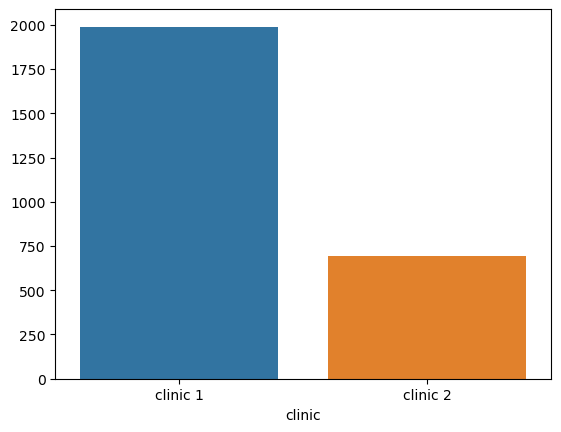

In [47]:
# Muestra la proporción de muertes por cada clínica y saca una conclusión del resultado
deaths_per_clinic = df_ydc.groupby('clinic')['deaths'].sum()
print(deaths_per_clinic)
print('La clínica 1 tiene muchas más muertes que la clínica 2')
sns.barplot(x=deaths_per_clinic.index, y=deaths_per_clinic.values)
plt.show()

In [64]:
# Aunque gráficamente sea evidente, muestra matemáticamente si hay diferencias significativas 
# (incluye el redactado de planteamiento de hipotesis)

clinic_1 = df_ydc[df_ydc['clinic'] == 'clinic 1']['deaths']
clinic_2 = df_ydc[df_ydc['clinic'] == 'clinic 2']['deaths']

ttest_clinicas = ttest(x=clinic_1, y=clinic_2, alternative='two-sided')

# Muestra la proporción de muertes por cada clínica y saca una conclusión del resultado
print('P-Value: ', ttest_clinicas['p-val'].values[0])
print('P-Value < 0.05, por lo que hay diferencias significativas entre las clínicas')

P-Value:  0.0029397418209283757
P-Value < 0.05, por lo que hay diferencias significativas entre las clínicas


## 3. Comienza el lavado de manos
<p>¿Por qué la proporción de muertes es consistentemente mucho más alta en la Clínica 1? Semmelweis vio el mismo patrón y estaba desconcertado y angustiado. La única diferencia era que los trabajadores de la clínica 2 solo atendían a las mujeres que daban a luz, mientras que los de la clínica 1 también pasaban tiempo en las salas de autopsias examinando cadáveres. </p>
<p>Semmelweis comenzó a sospechar que algo en los cadáveres se extendió de las manos de los estudiantes de medicina y causó fiebre puerperal.El doctor ordenó que se lavaran las manos, era considerada una propuesta rara ya que nadie en Viena sabía acerca de las bacterias en ese momento. </p>
<p>Carguemos los datos mensuales de la Clínica 1 para ver si el lavado de manos tuvo algún efecto.</p>

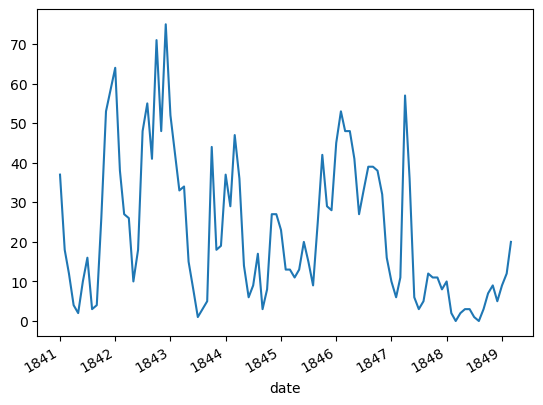

Se nota un efecto a partir de mediados de 1847


In [49]:
# Carga DataSet mensual
df_mdc = pd.read_csv('datasets/monthly_deaths.csv')
# Muestra gráficamente la evolución temporal, ¿Se nota algún efecto a partir de alguna fecha?
df_mdc['date'] = pd.to_datetime(df_mdc['date'])
df_mdc = df_mdc.set_index('date')
df_mdc['deaths'].plot()
plt.show()
print('Se nota un efecto a partir de mediados de 1847')

## 6. Se destaca el efecto del lavado de manos
<p>A partir del verano de 1847 (1847-06-01) la proporción de muertes se reduce drásticamente y, sí, fue entonces cuando Semmelweis hizo obligatorio el lavado de manos. </p>
<p>El efecto del lavado de manos se hace aún más claro si lo resaltamos en el gráfico.</p>

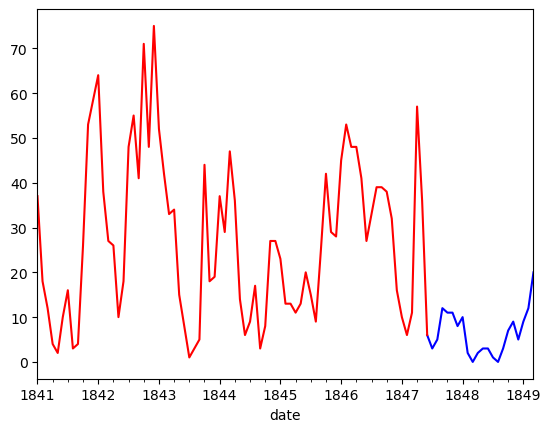

In [50]:
# Haz que en el gráfico se muestre la línea temporal en otro color a partir de esa fecha (1847-06-01)
# (Te va a costar un poco, pero espavila y busca en internet)
df_handwash = df_mdc.loc['1847-06-01':]
df_no_handwash = df_mdc.loc[:'1847-06-01']
df_handwash['deaths'].plot(color='blue')
df_no_handwash['deaths'].plot(color='red')
plt.show()

## 7. Lavado de manos, menos muertes?
<p>El doctor Semmelweis cuando propuso el lavado de manos, no solo prometió que se reduciriá las muertes respecto a las anteriores fechas, sino que incluso bajarían del 3% (una barbaridad teniendo en cuenta que en ese momento rondaba al 10%)</p> ¿Cumplió sus dos promesas?

In [71]:
# Te toca hacer dos test de hipotesis, uno de lavado vs no lavado y otro lavado vs 3%

ttest_handwash_greater = ttest(x=df_handwash['deaths'], y=df_no_handwash['deaths'], alternative='greater')
ttest_handwash_less = ttest(x=df_handwash['deaths'], y=df_no_handwash['deaths'], alternative='less')
birth_no_handwash = df_no_handwash['births'].sum()
death_no_handwash = df_no_handwash['deaths'].sum()
percentages_no_handwash = death_no_handwash / birth_no_handwash * 100
birth_handwash = df_handwash['births'].sum()
death_handwash = df_handwash['deaths'].sum()
percentages_handwash = death_handwash / birth_handwash * 100
print('El doctor Semmelweis cumplió con sus dos promesas ya que P-Value < 0.05 greater: ', ttest_handwash_greater['p-val'].values[0], 'y less:', ttest_handwash_less['p-val'].values[0])
print('y la diferencia de muertes entre lavado y no lavado es de', percentages_no_handwash - percentages_handwash, '%')

El doctor Semmelweis cumplió con sus dos promesas ya que P-Value < 0.05 greater:  0.9999999999999778 y less: 2.222134903504455e-14
y la diferencia de muertes entre lavado y no lavado es de 8.26068501933361 %


## 9. El destino del Dr. Semmelweis
<p>Entonces, en general, parecería que Semmelweis tenía pruebas sólidas de que lavarse las manos era un procedimiento simple pero muy eficaz que podía salvar muchas vidas.</p>
<p>La tragedia es que, a pesar de la evidencia, la teoría de Semmelweis —que la fiebre puerperal fue causada por alguna "sustancia" (lo que hoy conocemos como <em>bacteria</em>) de los cadáveres de la sala de autopsias— fue ridiculizada por el resto de científicos. La comunidad médica rechazó en gran medida su descubrimiento y en 1849 se vio obligado a abandonar el Hospital General de Viena para siempre.</p>
<p>Una de las razones de esto fue que las estadísticas y los argumentos estadísticos eran poco comunes en la ciencia médica en el siglo XIX. Semmelweis solo publicó sus datos como largas tablas de datos sin procesar, pero no mostró gráficos ni intervalos de confianza. Si hubiera tenido acceso al análisis que acabamos de hacer, podría haber tenido más éxito en conseguir que los médicos vieneses se lavaran las manos.</p>
¡Mala suerte crack!